# Vérification de la conduction thermique stationnaire avec terme source : terme source sinusoidal

In [1]:
from trustutils import run

run.introduction("D.Jamet")

## Introduction 
 Validation made by : D.Jamet



 Report generated 25/01/2022

### Description

On considère un problème de conduction thermique stationnaire avec un terme source volumique variant de manière sinusoidale dans la direction $x$.  On compare la solution obtenue par GENEPI à la solution analytique.  La température est imposée en entrée et sortie du domaine (cf.  jeu de données). On compare le  profil  de  température  dans  la  direction $x$ ainsi  que  le  champ  de  température  bidimensionnel. On compare également les flux conductifs sur les parois en entrée et sortie.

In [2]:
run.TRUST_parameters()

### TRUST parameters 
 * Version TRUST: 1.8.4
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/EF/EF_Conduc_S_sin_1/build)

In [3]:
from trustutils import run 
import os
c1 = run.addCase(".","conduc_genepi_S_sin_1.data")
run.printCases()
run.runCases()

### Test cases 
* ./conduc_genepi_S_sin_1.data : 


Running **with Sserver**...
  => A total of 1 cases were (successfully) run in 0.9s.


## Champs de température
On compare les champs de température calculé par GENEPI et analytique.  Cette comparaison se fait sur un profil en $y=cte$ et sur le champ 2D.
### Comparaison des profils calculé et analytique

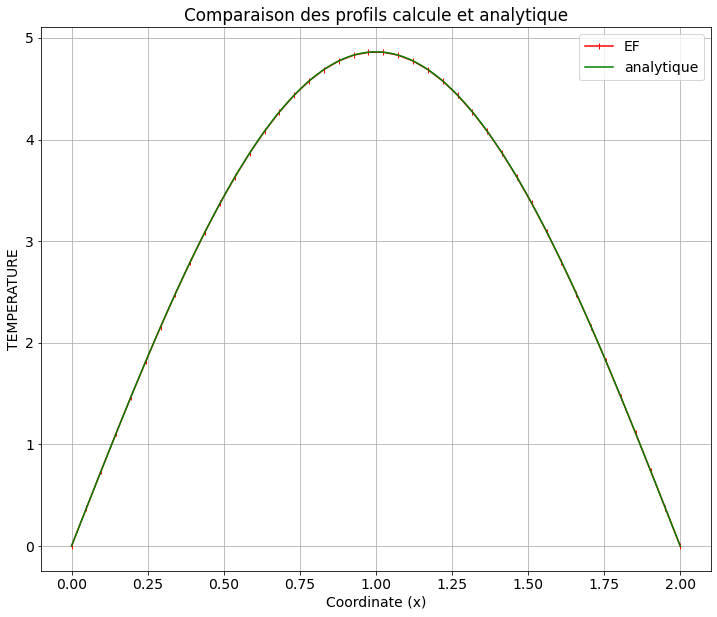

In [4]:
from trustutils.jupyter import plot
import numpy as np
import matplotlib.pyplot as plt

Graphique=plot.Graph("Comparaison des profils calcule et analytique")
Graphique.addSegment("conduc_genepi_S_sin_1_TEMPERATURE_X.son",value=5.77311784e+01,color="r",marker="-|",label="EF")
x=np.linspace(0,2,100)
y=(3./0.25*(2./3.141592654)*(2./3.141592654)*np.sin(3.141592654*x/2.))
Graphique.add(x,y,label="analytique",color="g")
Graphique.visu()

### Comparaison des champs 2D calculé et analytique 

On trace le champ d’écart entre la température calculée et la solution analytique.  La solution analytique est représentée par des isovaleurs du champ de température.

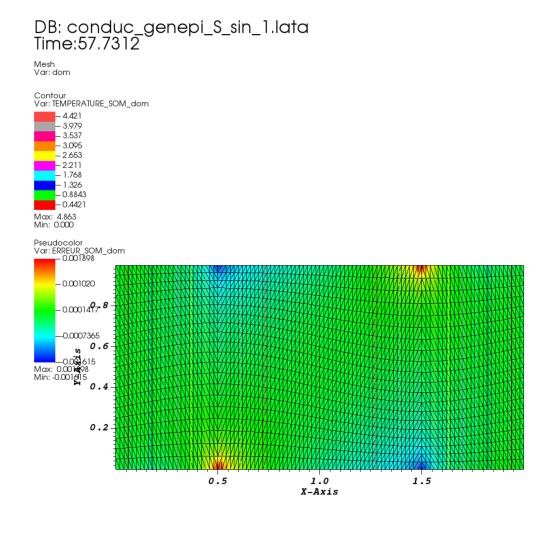

In [5]:
from trustutils import visitutils as visit
plot=visit.Show("./conduc_genepi_S_sin_1.lata","Contour","TEMPERATURE_SOM_dom")
plot.visitCommand("DefineScalarExpression(\"ERREUR_SOM_dom\",\"TEMPERATURE_SOM_dom-(3./0.25*(2./3.141592654)*(2./3.141592654)*sin(3.141592654*(coord(dom)[0])/2.))\")")
plot.addField("./conduc_genepi_S_sin_1.lata","Pseudocolor","ERREUR_SOM_dom") 
plot.plot()

## Flux conductifs aux frontières du domaine

On trace le champ d'écart entre la température calculée et la solution analytique.  La solution analytique est représentée par des isovaleurs du champ de température.

### Comparaison théorie/numérique

In [6]:
from trustutils.jupyter import plot
import numpy as np 

table=plot.Table(["flux gauche","flux droit"])
ref = [-1.910,-1.910]
table.addLigne([ref],"theorie")
data=plot.loadText("./conduc_genepi_S_sin_1_fin.out")
table.addLigne([data[[1,4]]],"calcul")
error=[int((ref[0]-data[1])*10000)/(100.*ref[0]),int((ref[1]-data[4])*10000)/(100*ref[1])]
table.addLigne([error],"erreur en %")
table.df 

,flux gauche,flux droit
theorie,-1.910000,-1.910000
calcul,-1.909455,-1.909455
erreur en %,0.026178,0.026178


## Data Files
### conduc_genepi_S_sin_1

In [7]:
from trustutils import run

run.dumpDataset("./conduc_genepi_S_sin_1.data")

 # Conduction 2D #
 # Terme source volumique sinusoidal #
 # Temperature imposee en entree et en sortie #
 # Symetrie sur les parois laterales #
 
 # PARALLEL OK 8 #
 dimension 2
 
 Pb_conduction pb
 Domaine dom
 # BEGIN MESH #
 Mailler dom
 {
 	 Pave Cavite 
  	 {
 	 	 Origine 0. 0.
 	 	 Nombre_de_Noeuds 101 21 
 	 	 Longueurs 2. 1.
 	 }
 	 {
 	 	 Bord Gauche X = 0. 0. <= Y <= 1.
 	 	 Bord Haut   Y = 1. 0. <= X <= 2.
 	 	 Bord Bas    Y = 0. 0. <= X <= 2.
 	 	 Bord Droit  X = 2. 0. <= Y <= 1.
 	 }
 } 
 
 transformer dom x y+0.3*y*(1.-y)*sin(2.*3.141592654*x/2.)
 trianguler dom
 
 # END MESH #
 # BEGIN PARTITION
 Partition dom
 {
 	 Partition_tool tranche { tranches 2 1 }
 	 Larg_joint 1
 	 zones_name DOM
 }
 End
 END PARTITION #
 
 # BEGIN SCATTER
 Scatter DOM.Zones dom
 END SCATTER #
 
 EF dis
 
 Scheme_euler_implicit sch
 Read sch
 {
 	 tinit 0
 	 dt_min 0.00001
 	 dt_sauv 100
 	 seuil_statio 1.e-8
 solveur piso { seuil_convergence_solveur 1e-12 }
 facsec 1e4
 }
 
 Solide sol
 Read s